In [8]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from python_scripts import csv_processing as dp

# import dtreeviz as dt
import warnings

warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import (
    train_test_split,
    KFold,
    cross_val_score,
    cross_validate,
)
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    confusion_matrix,
    classification_report,
    precision_score,
)
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils.class_weight import compute_class_weight

In [4]:
df = pd.read_csv("../data/3year.csv")
X, y = dp.df_null_removal(df)
# concatenating the features and target variable
df = pd.concat([X, y], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
# Initialize the Balanced Random Forest
brf = BalancedRandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Train the model
brf.fit(X_train, y_train)

# Make predictions
y_pred = brf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.6901475487862923
F1 Score:  0.1953028430160692
Recall:  0.7596153846153846
Precision:  0.11205673758865248
Confusion Matrix: 
 [[1371  626]
 [  25   79]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.69      0.81      1997
           1       0.11      0.76      0.20       104

    accuracy                           0.69      2101
   macro avg       0.55      0.72      0.50      2101
weighted avg       0.94      0.69      0.78      2101



In [12]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming binary classification with classes 0 and 1
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
print(class_weights)
class_weight_dict = {0: 0.01, 1: 100}

brt = BalancedRandomForestClassifier(
    class_weight=class_weight_dict,
    n_estimators=200,
    max_features="sqrt",
    min_samples_leaf=1,
    min_samples_split=2,
)

brf.fit(X_train, y_train)

# Make predictions
y_pred = brf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

[ 0.52441004 10.74168798]
Accuracy:  0.6901475487862923
F1 Score:  0.1953028430160692
Recall:  0.7596153846153846
Precision:  0.11205673758865248
Confusion Matrix: 
 [[1371  626]
 [  25   79]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.69      0.81      1997
           1       0.11      0.76      0.20       104

    accuracy                           0.69      2101
   macro avg       0.55      0.72      0.50      2101
weighted avg       0.94      0.69      0.78      2101



In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Initialize LDA
lda = LDA(
    n_components=None
)  # n_components can be set to reduce dimensions further, but by default, it's min(n_classes - 1, n_features)

# Fit LDA on the data and labels
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

brt = BalancedRandomForestClassifier(
    n_estimators=200, max_features="sqrt", min_samples_leaf=1, min_samples_split=2
)

# Train the classifier on the LDA-transformed training data
brt.fit(X_train_lda, y_train)

# Predict on the LDA-transformed test set
y_pred_lda = brt.predict(X_test_lda)

# Evaluate the model's performance
print("Accuracy: ", accuracy_score(y_test, y_pred_lda))
print("F1 Score: ", f1_score(y_test, y_pred_lda))
print("Recall: ", recall_score(y_test, y_pred_lda))
print("Precision: ", precision_score(y_test, y_pred_lda))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_lda))
print("Classification Report: \n", classification_report(y_test, y_pred_lda))

Accuracy:  0.5683008091385054
F1 Score:  0.13371537726838587
Recall:  0.6730769230769231
Precision:  0.07423117709437964
Confusion Matrix: 
 [[1124  873]
 [  34   70]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.56      0.71      1997
           1       0.07      0.67      0.13       104

    accuracy                           0.57      2101
   macro avg       0.52      0.62      0.42      2101
weighted avg       0.93      0.57      0.68      2101



Accuracy:  0.6920514040932889
F1 Score:  0.20613496932515338
Recall:  0.8076923076923077
Precision:  0.11814345991561181
Confusion Matrix: 
 [[1370  627]
 [  20   84]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.69      0.81      1997
           1       0.12      0.81      0.21       104

    accuracy                           0.69      2101
   macro avg       0.55      0.75      0.51      2101
weighted avg       0.94      0.69      0.78      2101

Feature importances:
Attr24: 0.04463264310005291
Attr26: 0.036327781137032555
Attr46: 0.03407603981908516
Attr16: 0.03278910699488921
Attr13: 0.02488630758692421
Attr25: 0.0239251124532502
Attr38: 0.021371659037572946
Attr12: 0.02085305805275849
Attr21: 0.020172054590350562
Attr27: 0.01996745145612031
Attr6: 0.019543586793961593
Attr39: 0.01925543174315058
Attr51: 0.01820862422945638
Attr5: 0.018011339626697882
Attr22: 0.01744140216144505
Attr55: 0.017299180063183255
Attr35: 

<Axes: >

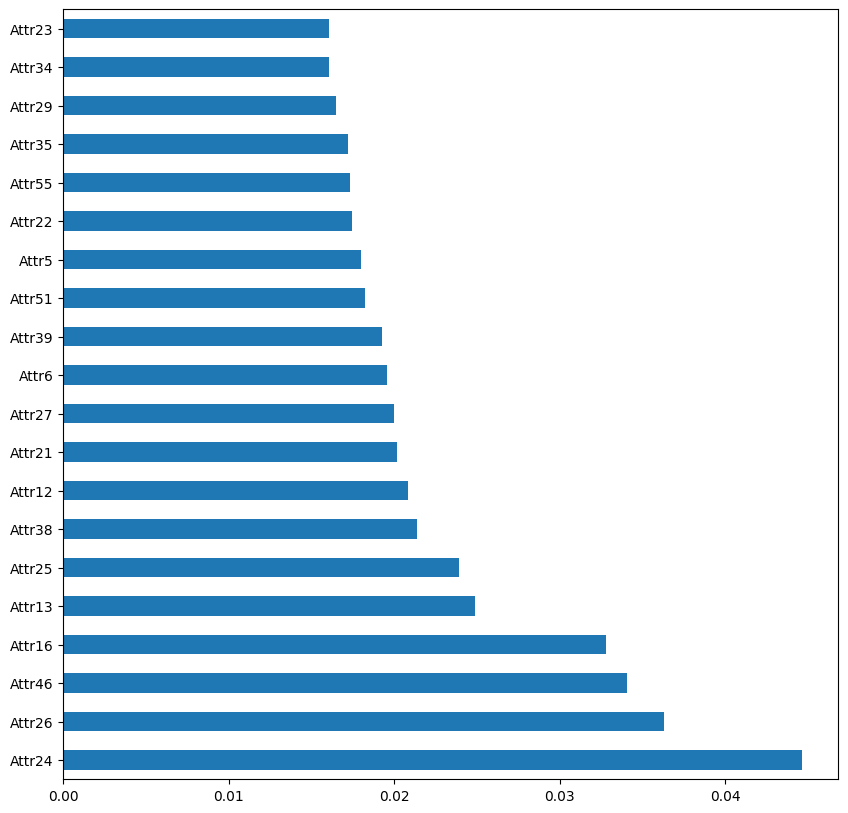

In [14]:
brt = BalancedRandomForestClassifier(
    n_estimators=200, max_features="sqrt", min_samples_leaf=1, min_samples_split=2
)
brt.fit(X_train, y_train)
y_pred = brt.predict(X_test)
# all attribute of X_train
features = X.columns

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

feature_importances = brt.feature_importances_
feature_importances = pd.Series(feature_importances, index=X.columns)
sorted_indices = np.argsort(feature_importances)[::-1]

print("Feature importances:")
for idx in sorted_indices:
    print(f"{features[idx]}: {feature_importances[idx]}")
# print(len(feature_importances))

plt.figure(figsize=(10, 10))
feature_importances.nlargest(20).plot(kind="barh")

In [15]:
selected_features = [
    "Attr26",
    "Attr24",
    "Attr27",
    "Attr5",
    "Attr36",
    "Attr9",
    "Attr58",
    "Attr45",
    "Attr56",
]

# Subset the training and testing data to include only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize a new Random Forest classifier
brt_selected = BalancedRandomForestClassifier(
    n_estimators=200, max_features="sqrt", min_samples_leaf=1, min_samples_split=2
)

# Train the classifier on the subsetted training data
brt_selected.fit(X_train_selected, y_train)

# Predict on the subsetted test data
y_pred_selected = brt_selected.predict(X_test_selected)

# Evaluate the model's performance (optional)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)
recall_selected = recall_score(y_test, y_pred_selected)
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)
class_report_selected = classification_report(y_test, y_pred_selected)

# Print the evaluation metrics
print(f"Accuracy with selected features: {accuracy_selected}")
print(f"F1 Score with selected features: {f1_selected}")
print(f"Recall Score with selected features: {recall_selected}")
print(f"Confusion Matrix with selected features:\n{conf_matrix_selected}")
print(f"Classification Report with selected features:\n{class_report_selected}")

feature_importances = brt_selected.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

print("Feature importances:")
for idx in sorted_indices:
    print(f"{selected_features[idx]}: {feature_importances[idx]}")

Accuracy with selected features: 0.7339362208472157
F1 Score with selected features: 0.2203626220362622
Recall Score with selected features: 0.7596153846153846
Confusion Matrix with selected features:
[[1463  534]
 [  25   79]]
Classification Report with selected features:
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1997
           1       0.13      0.76      0.22       104

    accuracy                           0.73      2101
   macro avg       0.56      0.75      0.53      2101
weighted avg       0.94      0.73      0.81      2101

Feature importances:
Attr24: 0.17467236481276732
Attr26: 0.16665910449702787
Attr5: 0.10240212117046128
Attr27: 0.09928387376122705
Attr9: 0.09468233749747135
Attr36: 0.09358365777375777
Attr58: 0.09105830569124809
Attr56: 0.0903506920778023
Attr45: 0.087307542718237


In [1]:
def find_best_k_features_for_f1(model, X_train, y_train, X_test, y_test):
    original_n_features = X_train.shape[1]

    train_f1_dict = {}
    test_f1_dict = {}

    for k in range(1, original_n_features + 1):
        X_train_selected, X_test_selected, y_train_selected, y_test_selected = (
            get_df_with_top_k_features(k, X_train, X_test, y_train, y_test)
        )
        model.fit(X_train_selected, y_train_selected)
        y_train_pred = model.predict(X_train_selected)
        y_test_pred = model.predict(X_test_selected)

        train_f1 = f1_score(y_train_selected, y_train_pred)
        test_f1 = f1_score(y_test_selected, y_test_pred)

        train_f1_dict[k] = train_f1
        test_f1_dict[k] = test_f1

    best_train_f1_k = max(train_f1_dict, key=train_f1_dict.get)
    best_test_f1_k = max(test_f1_dict, key=test_f1_dict.get)

    print(f"Best k for train F1 score: {best_train_f1_k}")
    print(f"Best k for test F1 score: {best_test_f1_k}")

    plot_ANOVA_f1_graph(train_f1_dict, test_f1_dict)


def plot_ANOVA_f1_graph(train_f1_dict, test_f1_dict):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    plt.plot(
        list(train_f1_dict.keys()),
        list(train_f1_dict.values()),
        label="Train F1 Score",
        color="blue",
    )
    plt.plot(
        list(test_f1_dict.keys()),
        list(test_f1_dict.values()),
        label="Test F1 Score",
        color="red",
    )
    plt.xlabel("Number of Features")
    plt.ylabel("F1 Score")
    plt.title("F1 Score vs. Number of Features")
    plt.legend()
    plt.grid(True)
    plt.show()


def get_df_with_top_k_features(k, X_train, X_test, y_train, y_test):
    # Initialize SelectKBest with the ANOVA F-test as the score function
    selector = SelectKBest(score_func=f_classif, k=k)

    # Fit the selector to the training data and transform the training and test data
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # Since SelectKBest returns NumPy arrays, convert them back to DataFrame if needed
    # Get the selected feature names
    features = selector.get_support(indices=True)
    feature_names = X_train.columns[features]

    X_train_selected = pd.DataFrame(X_train_selected, columns=feature_names)
    X_test_selected = pd.DataFrame(X_test_selected, columns=feature_names)

    return X_train_selected, X_test_selected, y_train, y_test

Best k for train F1 score: 50
Best k for test F1 score: 51


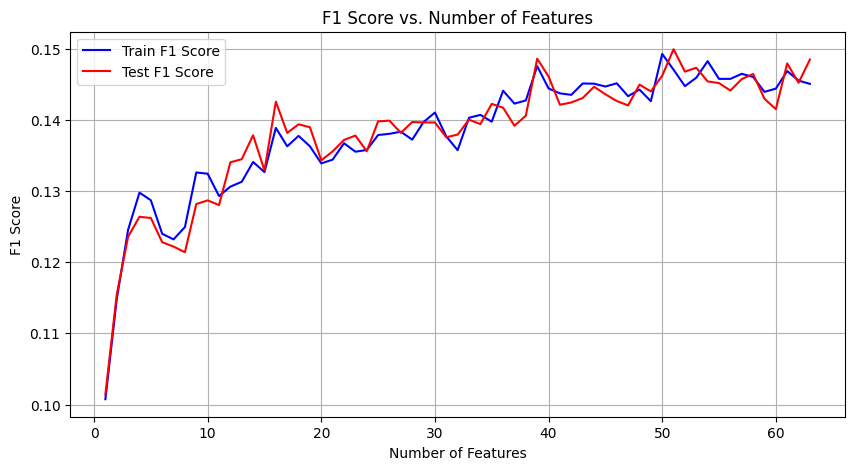

In [9]:
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

brt = BalancedRandomForestClassifier(
    class_weight=class_weight_dict,
    n_estimators=200,
    max_features="sqrt",
    min_samples_leaf=4,
    min_samples_split=10,
    max_depth=15,
    random_state=42,
)

find_best_k_features_for_f1(brt, X_train, y_train, X_test, y_test)